In [15]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [17]:
data = pd.read_csv('/home/sargam/things/college/daa/lp3/ml/diabetes/diabetes.csv')

In [18]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [20]:
print(data.isnull().sum())

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


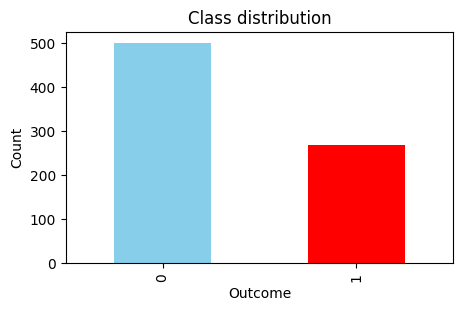

In [21]:
# Step 3: Exploratory Data Analysis (optional)
plt.figure(figsize=(5,3))
data['Outcome'].value_counts().plot(kind='bar', color=['skyblue','red'])
plt.title('Class distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [22]:
# Step 4: Prepare features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [23]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

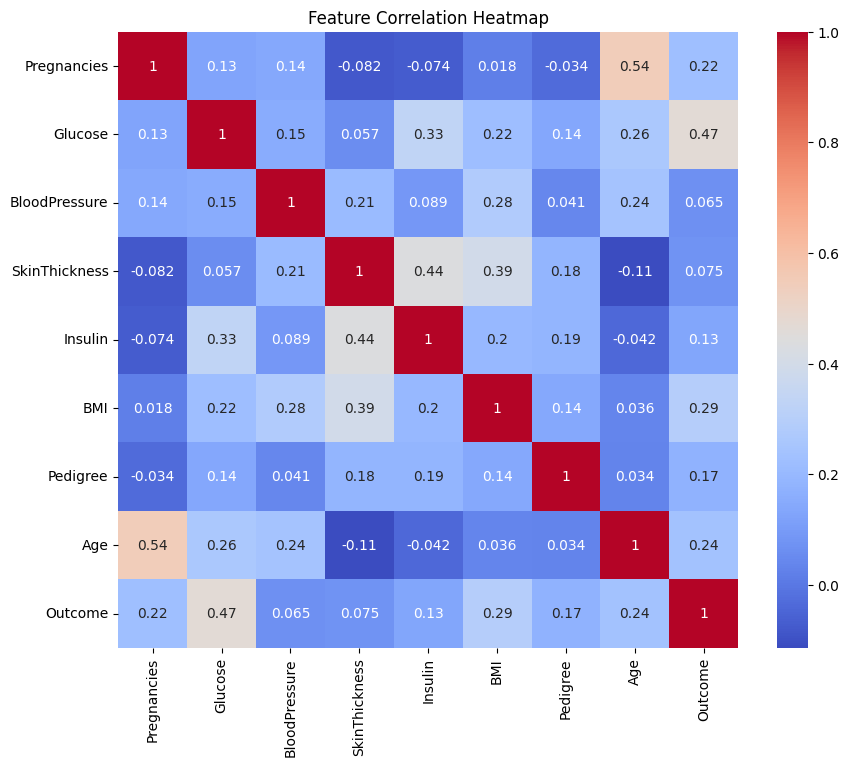

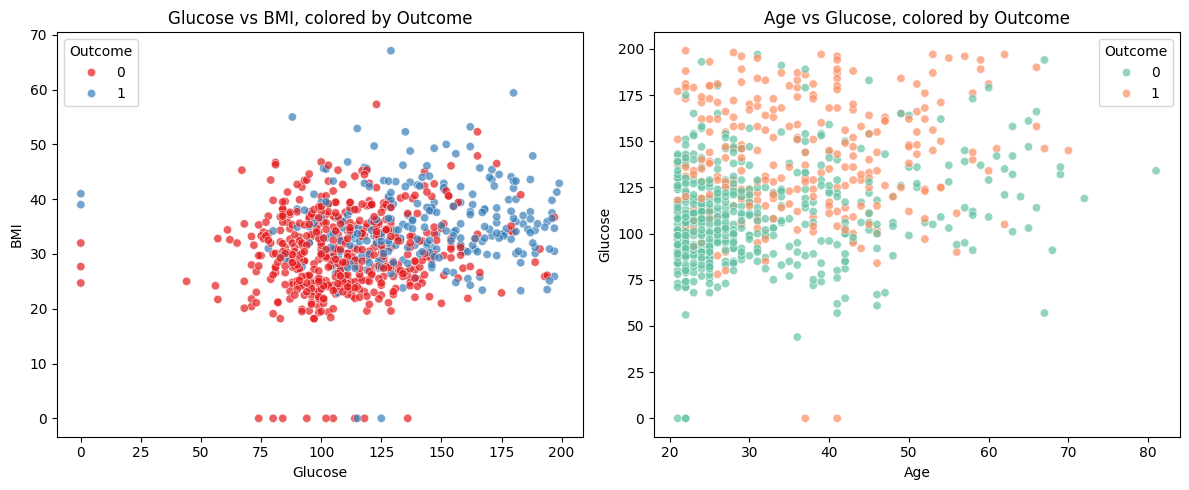

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Scatter plots for two important features against Outcome
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data, palette='Set1', alpha=0.7)
plt.title('Glucose vs BMI, colored by Outcome')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=data, palette='Set2', alpha=0.7)
plt.title('Age vs Glucose, colored by Outcome')

plt.tight_layout()
plt.show()


In [25]:
# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Step 7: Find the best k (elbow method)
accuracy_values = []
k_values = list(range(1, 21))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_values.append(acc)

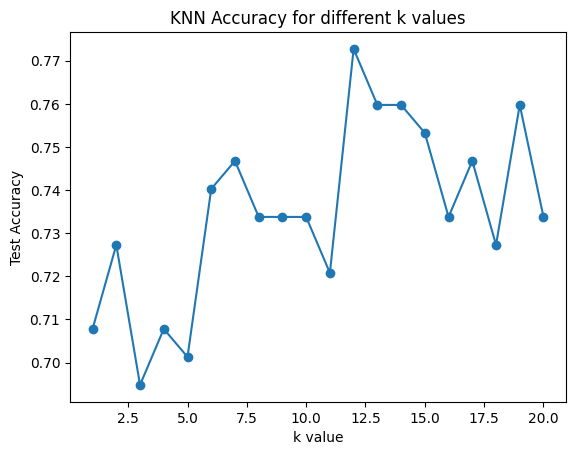

In [27]:
plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('k value')
plt.ylabel('Test Accuracy')
plt.title('KNN Accuracy for different k values')
plt.show()


In [28]:
best_k = k_values[np.argmax(accuracy_values)]
print("Best k value:", best_k)

Best k value: 12


In [29]:
# Step 8: Train final KNN model with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


In [30]:
# Step 9: Compute confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[88 12]
 [23 31]]


In [31]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
cr = classification_report(y_test, y_pred, digits=2)
print("Classification Report:\n", cr)
print('Accuracy:', accuracy)
print('Error rate:', error_rate)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

Accuracy: 0.7727272727272727
Error rate: 0.2272727272727273


In [32]:
# Step 10: Manually compute and print precision and recall for Outcome=1 (positive class)
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"Precision (Outcome=1): {precision:.2f}")
print(f"Recall (Outcome=1): {recall:.2f}")

Precision (Outcome=1): 0.72
Recall (Outcome=1): 0.57


In [33]:
from sklearn import metrics

In [36]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(mae)

0.22727272727272727
